### Table des matiéres
- objectif et introduction
- librairie
- analyse
- exploration
- EDA saveurs et effets
- Preprocessing
- Modeling
- Evalutation

### Introduction

Cette exploration veut découvrir les effets et les saveurs liés aux types de cannabis. Je vais utiliser la colonne Rating comme guide d'exploration

#### Intro 2 le retour

Le cannabis (Cannabis L.) est un genre botanique qui rassemble des plantes annuelles de la famille des Cannabaceae. Ce sont toutes des plantes originaires d'Asie centrale ou d'Asie du Sud. La classification dans ce genre est encore discutée. Selon la majorité des auteurs il contiendrait une seule espèce, le Chanvre cultivé (Cannabis sativa L.), parfois subdivisée en plusieurs sous-espèces1, généralement sativa, indica et ruderalis (syn. spontanea), tandis que d'autres considèrent que ce sont de simples variétés. Les plantes riches en fibres et pauvres en Tétrahydrocannabinol (THC) donnent le « chanvre agricole » qui pousse dans les pays tempérés, exploité pour ses sous-produits (fibres, graines...) aux usages industriels variés, tandis que le « chanvre indien », qui pousse en climat équatorial, est au contraire très riche en résine et exploité surtout pour ses propriétés médicales et psychotropes.

De nombreuses lignées de cannabis sont, en outre, obtenues par hybridation entre sous-espèces ou variétés du genre, par sélection des plantes ou encore par le bouturage qui permet de les cloner à l'identique. Ainsi les plants sont triés en fonction de l'usage que l'on souhaite en faire ou de la législation locale : qualité de leurs fibres, richesse en huile de leurs graines (chènevis), leur faible taux de THC ou, au contraire, leur concentration élevée en cannabinoïdes dans le cadre des usages médicaux ou comme drogue.

Le chanvre fut très largement utilisé au cours de l'histoire. Il côtoie l'être humain depuis le Néolithique. Il a toutefois été peu à peu fortement réglementé ou même interdit au cours du XXe siècle, en raison de ses propriétés psychotropes et des effets du cannabis sur la santé. La culture du chanvre agricole connaît un rebond dans les années 1970 avec l'augmentation du prix du pétrole, favorisée également par l'émergence de nouveaux débouchés et la prise de conscience environnementale. Avec 47 000 hectares cultivés en 2017, le Maroc est le principal producteur de cannabis au monde, devant la Mongolie (15 000 hectares).

Le cannabis récréatif est considéré comme une drogue douce, notamment du fait de l'impossibilité de faire une overdose de THC. Une dépendance psychique au cannabis reste possible, mais non physique comme dans le cas des drogues dites dures. Par ailleurs, des effets métaboliques néfastes ont été observés. L'usage récréatif du cannabis est aujourd'hui autorisé dans plusieurs états américains, ainsi qu'en Uruguay et au Canada, qui est en juin 2018 le premier pays du G7 à voter la légalisation. Selon l’Office des Nations unies contre la drogue et le crime, 180 millions de personnes ont consommé au moins une fois du cannabis à usage récréatif en 2017. En 2018 et 2019, des études montrent qu'une consommation régulière de cannabis chez l'adolescent induit une baisse irréversible de QI et favorise l'apparition de troubles psychotiques. 

#### Qu'elles questions allons nous nous demandez .
- Qu'elle est la distibution de notre base de données ?
- Tous les types de souches ont la même distribution ?
- Quel est le premier mot dans la description de chaque espèce?
- Les effets sont ils important pour le "rating"
- qu'elles sont les différences entre effet et saveur pour les différentes éspéces

### Librairie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
# For NLP et World Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

E:\systeme\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Import Dataset

In [2]:
df_strains = pd.read_csv("cannabis.csv")

### Analyse 

In [3]:
df_strains.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [4]:
df_strains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [5]:
df_strains.describe()

,Rating
count,2351.000000
mean,4.310634
std,0.836394
min,0.000000
25%,4.200000
50%,4.400000
75%,4.700000
max,5.000000


In [6]:
df_strains['Type'] = df_strains.Type.astype(str)
df_strains.nunique()

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64

In [7]:
df_strains.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C7F771048>]],
      dtype=object)

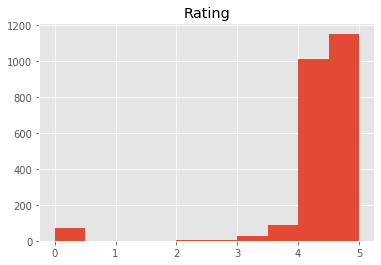

In [8]:
df_strains.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C0279F708>,
      dtype=object)

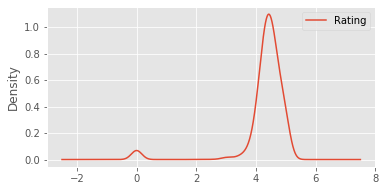

In [9]:
df_strains.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,10))

#### Distribution des épséces
- Indicas
- Sativas
- Hybrid

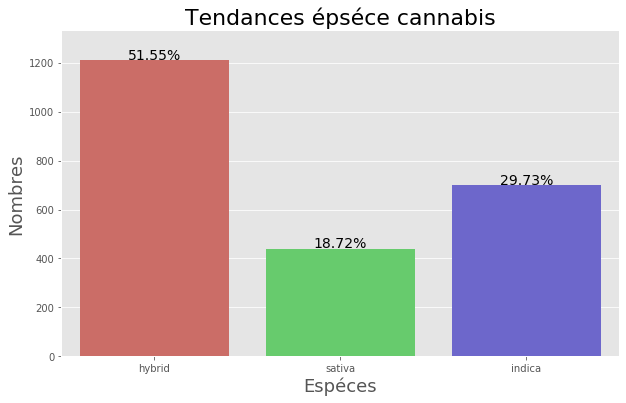

In [10]:
#First, I will look the distribuition of Types
total = len(df_strains)
plt.figure(figsize=(10,6))

g = sns.countplot(x="Type", data=df_strains, palette='hls', color='blue')
g.set_title("Tendances épséce cannabis", fontsize=22)
g.set_xlabel('Espéces', fontsize=18)
g.set_ylabel('Nombres', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### "Rating" par éspéces de cannabis

In [11]:
# note > 3
pd.crosstab(df_strains[df_strains.Rating > 3.0]['Rating'], df_strains.Type).T

Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Type,,,,,,,,,,,,,,,,,,,,
hybrid,1,1,2,2,5,6,7,9,9,62,56,113,150,144,164,114,95,88,31,102
indica,0,2,0,1,2,4,5,10,12,24,33,64,89,83,94,78,47,41,19,70
sativa,0,0,1,2,2,1,4,4,8,18,12,48,58,57,59,50,22,30,9,38


### Visualisation "Rating" pour les différentes éspéces

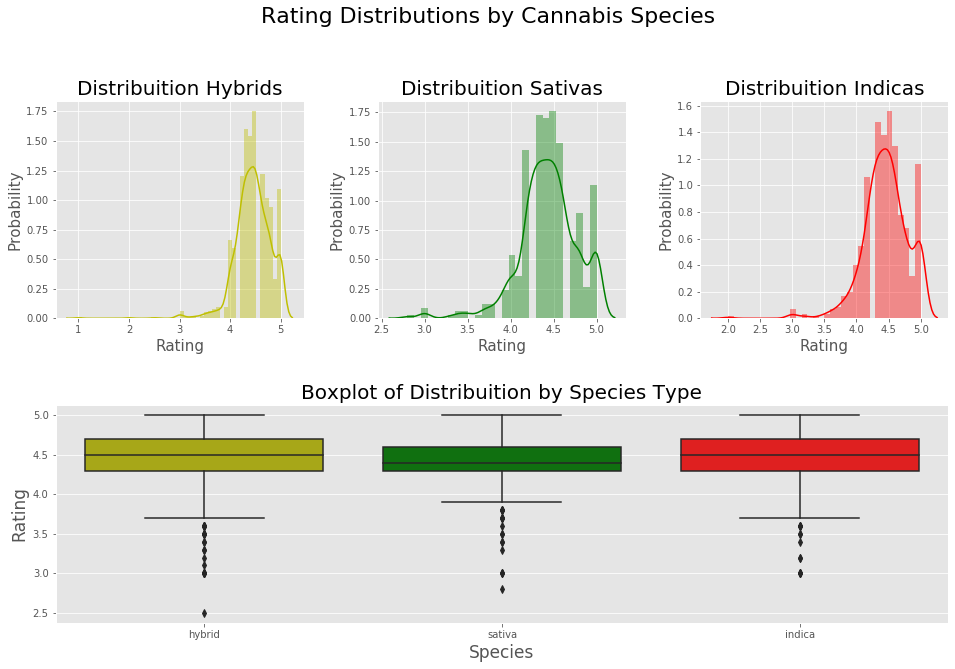

In [12]:
plt.figure(figsize=(16,10))

plt.suptitle('Rating Distributions by Cannabis Species', fontsize=22)

#Let's look the Rating distribuition by Type.
g = plt.subplot(231)
g = sns.distplot(df_strains[(df_strains.Type == 'hybrid') & 
                               (df_strains.Rating > 0)]["Rating"],
                 color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.distplot(df_strains[(df_strains.Type == 'sativa') & 
                               (df_strains.Rating > 0)]["Rating"],
                  color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Probability", fontsize=15)
g1.set_title("Distribuition Sativas",
             fontsize=20)

g2 = plt.subplot(233)
g2 = sns.distplot(df_strains[(df_strains.Type == 'indica') & 
                               (df_strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Probability", fontsize=15)
g2.set_title("Distribuition Indicas", 
             fontsize=20)

g3 = plt.subplot(212)

my_pal = {"hybrid": "y", "sativa": "g", "indica":"r"}

#I will now explore the Rating distribuition by Type
g3 = sns.boxplot(x="Type",y="Rating",  palette=my_pal,
                data=df_strains[df_strains["Rating"] > 2])
g3.set_title("Boxplot of Distribuition by Species Type", 
            fontsize=20)
g3.set_xlabel("Species", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()

##### Sativa et Indica ont une distribution de notation similaire, et nous pouvons voir que presque toutes les espèces dans l'ensemble de données ont une note supérieure à 4.
La note Sativa est légèrement inférieure à celle des hybrides et des indicas.

### Effets contre Saveurs

In [13]:
# exctraction valeur dans effets, saveurs et création de nouvelle colonne
df_effect = pd.DataFrame(df_strains.Effects.str.split(',',4).tolist(),columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])
df_effect.head()

,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5
0,Creative,Energetic,Tingly,Euphoric,Relaxed
1,Relaxed,Aroused,Creative,Happy,Energetic
2,Uplifted,Happy,Relaxed,Energetic,Creative
3,Tingly,Creative,Hungry,Relaxed,Uplifted
4,Happy,Relaxed,Euphoric,Uplifted,Talkative


In [14]:
df_flavors = pd.DataFrame(df_strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),columns = ['Flavor_1','Flavor_2','Flavor_3'])
df_flavors.head()

,Flavor_1,Flavor_2,Flavor_3
0,Earthy,Sweet,Citrus
1,Flowery,Violet,Diesel
2,Spicy/Herbal,Sage,Woody
3,Apricot,Citrus,Grapefruit
4,Citrus,Earthy,Orange


In [15]:
#Concatenation des nouvelles variable dans notre dataset

In [16]:
df_strains = pd.concat([df_strains, df_effect], axis=1)
df_strains = pd.concat([df_strains, df_flavors], axis=1)
df_strains.head()

,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


#### Effets, saveurs et "rating"

The top 5 First Effects related
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


Text(0.5, 1.0, 'First Effect Related x Rating by Species Type')

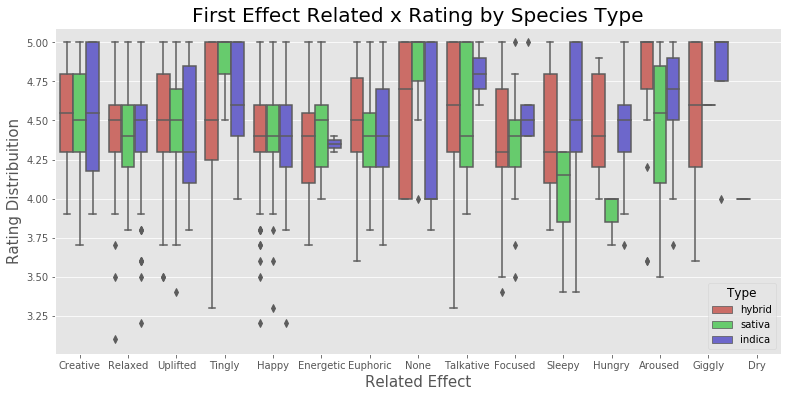

In [17]:
print("The top 5 First Effects related")
print(df_strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating", hue="Type", data=df_strains[df_strains["Rating"] > 3], palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",fontsize=20)

The top 5 Second related Effects
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: Effect_2, dtype: int64


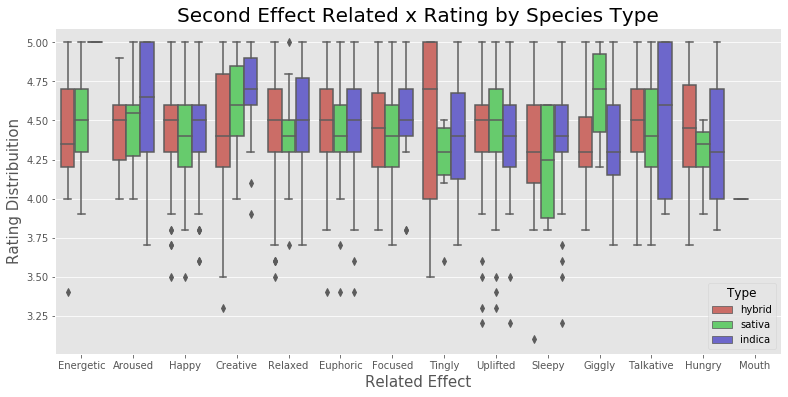

In [18]:
print("The top 5 Second related Effects")
print(df_strains['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=df_strains[df_strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",
            fontsize=20)

plt.show()

#### 1er saveur

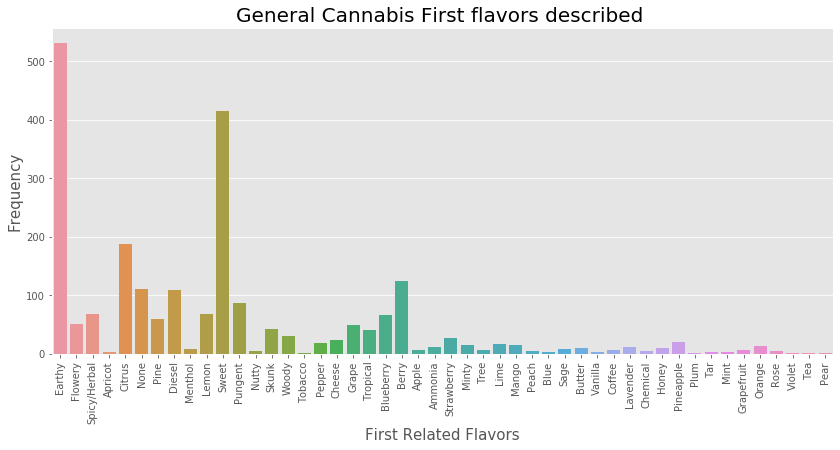

In [19]:
plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=df_strains)
plt.xticks(rotation=90)
plt.xlabel('First Related Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("General Cannabis First flavors described ", fontsize=20)
plt.show()

#### Souche préféré

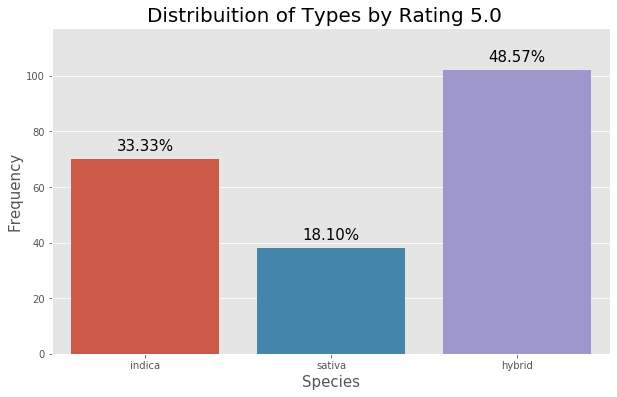

In [20]:
total_rat5 = len(df_strains[df_strains["Rating"] == 5])

plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=df_strains[df_strains["Rating"] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", 
            fontsize=20)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_rat5 * 100),
            ha="center", fontsize=15) 
g.set_ylim(0,max(sizes)*1.15)

plt.show()

Analyse  a faire ici !!

### Exploring the principal effects and Flavors Related in Rating five strains

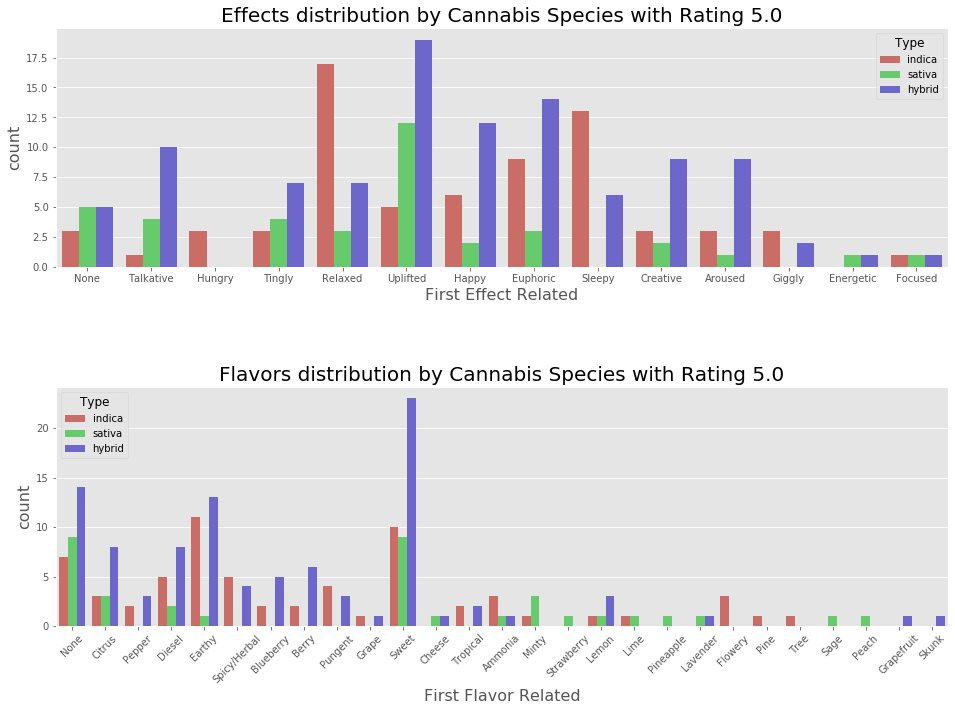

In [21]:
strains_top = df_strains[df_strains["Rating"] == 5]

plt.figure(figsize=(16,11))

plt.subplot(211)
g = sns.countplot(x ='Effect_1',data = strains_top,hue="Type",
              palette='hls')
g.set_title("Effects distribution by Cannabis Species with Rating 5.0", fontsize=20)
g.set_xlabel('First Effect Related', fontsize=16)
g.set_ylabel('count', fontsize=16)

plt.subplot(212)
g1 = sns.countplot(x ='Flavor_1',data = strains_top,hue="Type",
              palette='hls')
g1.set_title("Flavors distribution by Cannabis Species with Rating 5.0", fontsize=20)
g1.set_xlabel('First Flavor Related', fontsize=16)
g1.set_ylabel('count', fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5)

plt.show()

Analyse  a faire ici !!


#### Now I will Explore the total Effects and Flavors related to each strain

In [22]:
hibridas = df_strains[df_strains.Type == 'hybrid']
indicas = df_strains[df_strains.Type == 'indica']
sativas = df_strains[df_strains.Type == 'sativa']

In [23]:
#Now we can delete some columns that will not be useful
del df_strains["Effects"]
del df_strains["Flavor"]

In [24]:
#Creating the spliter -- by LiamLarsen -- 
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

### Sativa effects

In [25]:
#Runing flavors counts to sativas
sativa_effects = get_effects(sativas)
sativa_effects = pd.DataFrame.from_dict(sativa_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_effects = get_effects(indicas)
indica_effects = pd.DataFrame.from_dict(indica_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_effects = get_effects(hibridas)
hibridas_effects = pd.DataFrame.from_dict(hibridas_effects,
                                          orient='index').reset_index().rename(columns={'index': 'effects',
                                                                                        0:'count'})

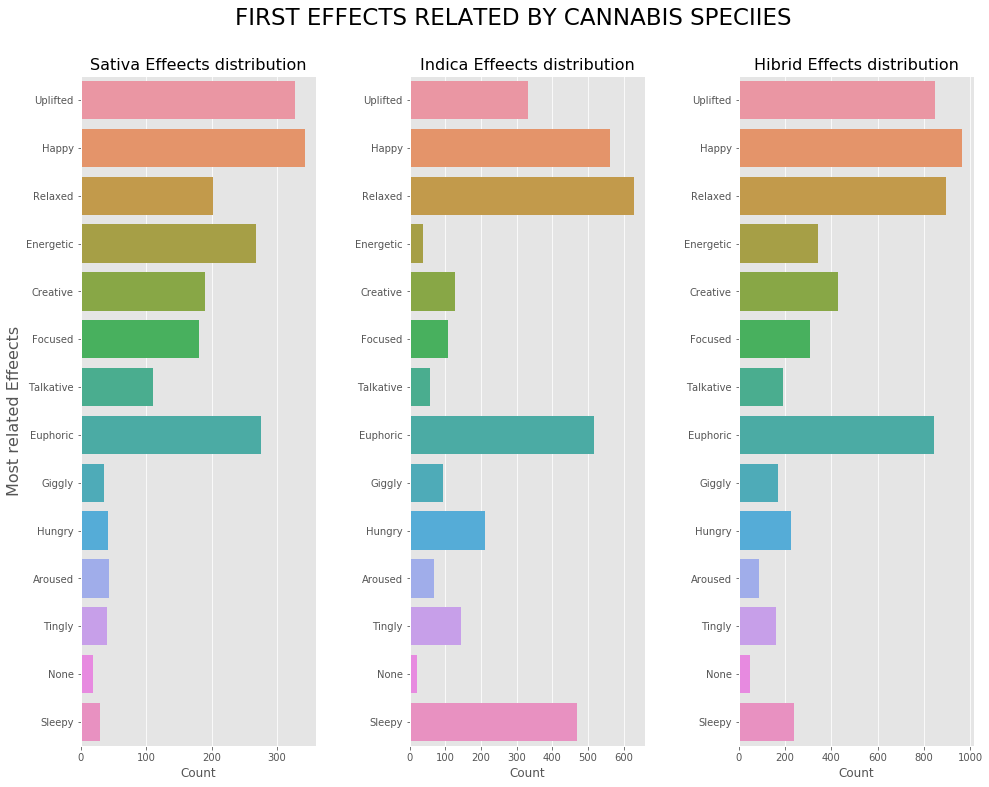

In [26]:
plt.figure(figsize=(16,12))

plt.suptitle('FIRST EFFECTS RELATED BY CANNABIS SPECIIES', fontsize=23)

plt.subplot(131)
g = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=sativa_effects, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related Effeects", fontsize=16)
g.set_title("Sativa Effeects distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=indica_effects, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica Effeects distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values, 
                data=hibridas_effects, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid Effects distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()



Some observations:

We can clearly see that Happy, Uplified, Relaxed, Euphoric have a high ranking at all 3 types

Its interesting that almost 350 people of 440 in Sativas related Happy and Uplifted Effects

    'Happy': 342
    'Uplifted': 328
    'Euphoric': 276
    'Energetic': 268

78% has described Happy to Sativas strains

Indicas we have 699 votes and Relaxed with most frequency at distribuition:

    'Relaxed': 628
    'Happy': 562
    'Euphoric': 516
    'Sleepy': 468

90% has described Relaxed to Indica strains

Hybrids We have 1212 votes and distribuition of effects is

    'Happy': 967
    'Relaxed': 896
    'Uplifted': 848
    'Euphoric': 843

80% has described Happy and 74% related Relaxed to Hybrids strains
Very Interesting!

We also need to remember that's possible to vote in more than 1 effect or flavor in each vote.


### Exploring general Flavors and Effects:

In [27]:
#Creating flavors to cut each flavor by row -- inspired in LiamLarsen --
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

In [28]:


#Runing flavors counts to sativas
sativa_flavors = flavors(sativas)
sativa_flavors = pd.DataFrame.from_dict(sativa_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_flavors = flavors(indicas)
indica_flavors = pd.DataFrame.from_dict(indica_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_flavors = flavors(hibridas)
hibridas_flavors = pd.DataFrame.from_dict(hibridas_flavors,
                                          orient='index').reset_index().rename(columns={'index': 'flavors',
                                                                                        0:'count'})



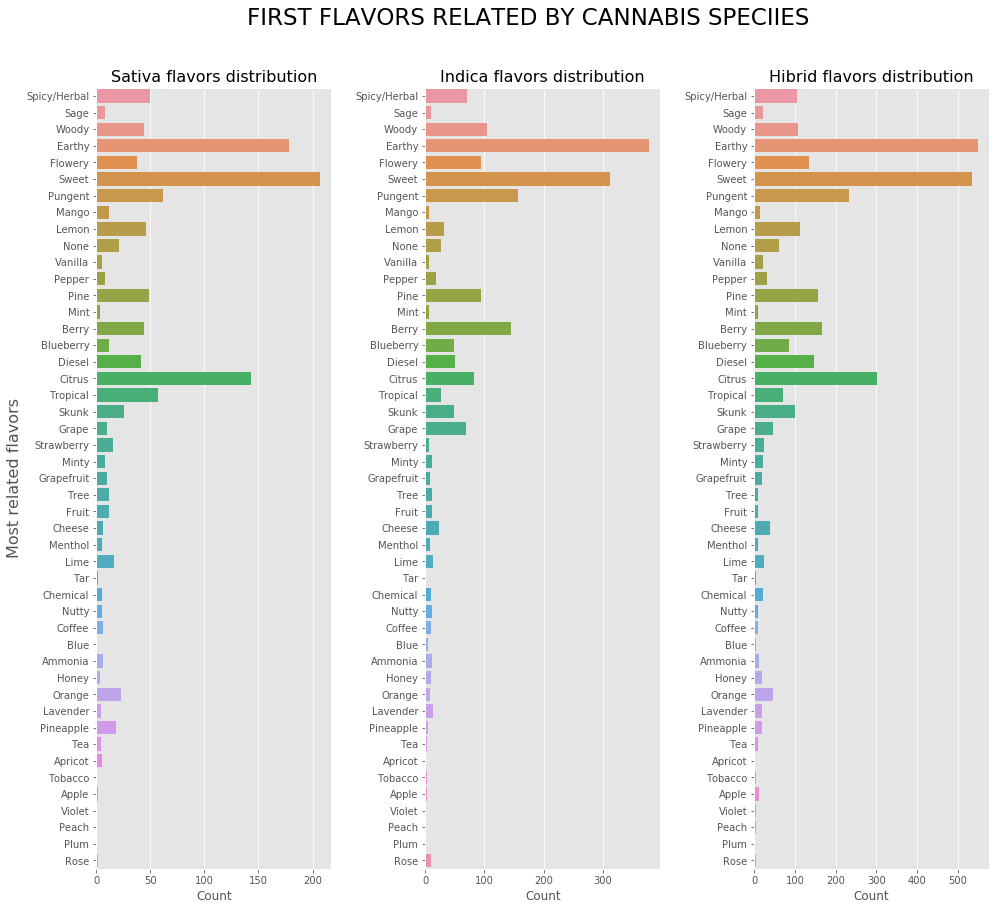

In [29]:
plt.figure(figsize=(16,14))
plt.suptitle('FIRST FLAVORS RELATED BY CANNABIS SPECIIES', fontsize=23)
plt.subplot(131)
g = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=sativa_flavors, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related flavors", fontsize=16)
g.set_title("Sativa flavors distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=indica_flavors, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica flavors distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=hibridas_flavors, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid flavors distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()



Most frequent flavors in Sativas:
Sweet: 207
Earthy: 178
Citrus: 143

Most frequent values in indicas
Earthy: 378
Sweet: 312
Pungent: 157
Berry: 145

The most frequent values in Hybrid type is:
Earthy: 549
Sweet: 534
Citrus: 301 

### Description Feature


In [30]:
# geting total words in review
df_strains['count_word'] = df_strains["Description"].apply(lambda x: len(str(x).split()))

# geting total letters in review
df_strains['count_letters'] = df_strains["Description"].apply(lambda x: len(str(x)))

# geting mean lenght of words
df_strains["mean_word_len"] = df_strains["Description"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

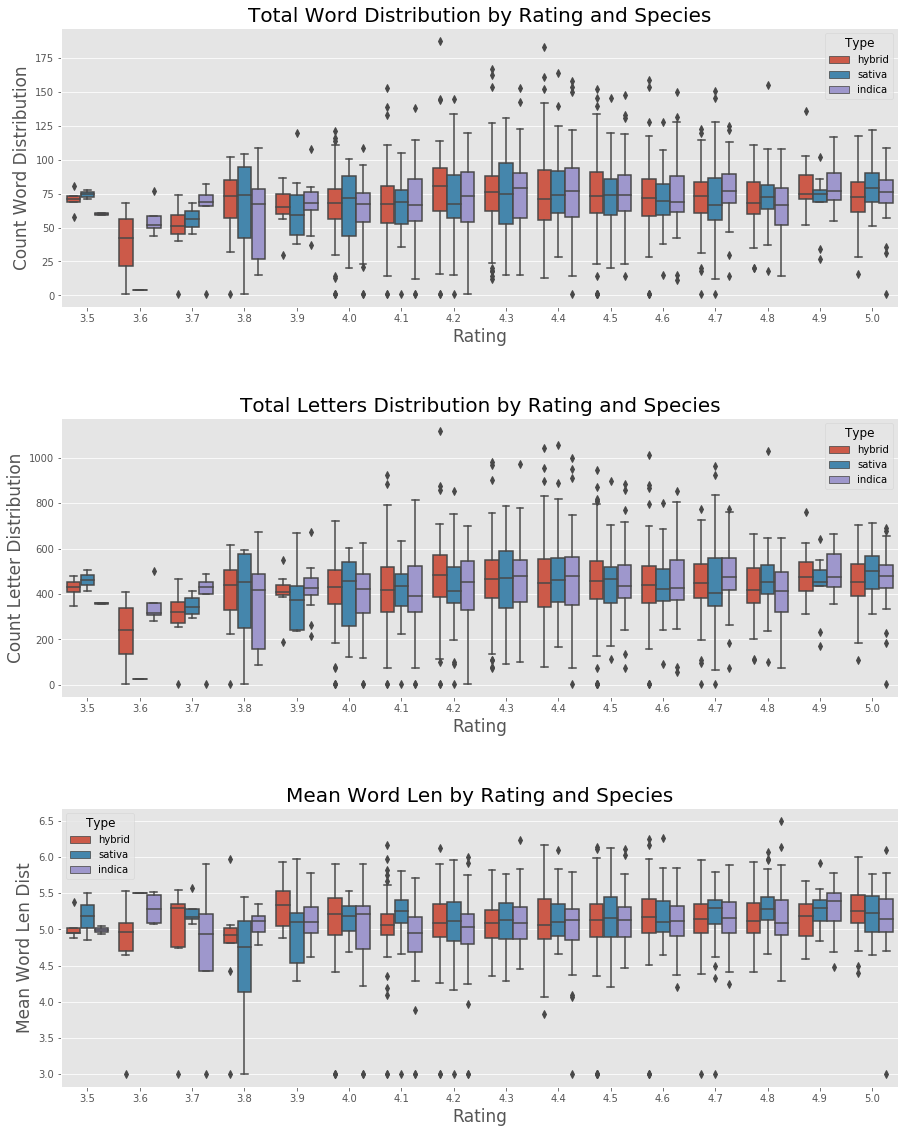

In [31]:
plt.figure(figsize=(15,17))

g = plt.subplot(311)
g = sns.boxplot(x='Rating', y='count_word', 
                hue='Type', data=df_strains[df_strains['Rating'] >= 3.5])
g.set_xlabel("Rating", fontsize=17)
g.set_ylabel("Count Word Distribution", fontsize=17)
g.set_title("Total Word Distribution by Rating and Species", 
             fontsize=20)

g1 = plt.subplot(312)
g1 = sns.boxplot(x='Rating', y='count_letters', 
                 hue='Type', data=df_strains[df_strains['Rating'] >= 3.5])
g1.set_xlabel("Rating", fontsize=17)
g1.set_ylabel("Count Letter Distribution", fontsize=17)
g1.set_title("Total Letters Distribution by Rating and Species", 
             fontsize=20)

g2 = plt.subplot(313)
g2 = sns.boxplot(x='Rating', y='mean_word_len',
                 hue='Type', data=df_strains[df_strains['Rating'] >= 3.5])
g2.set_xlabel("Rating", fontsize=17)
g2.set_ylabel("Mean Word Len Dist", fontsize=17)
g2.set_title("Mean Word Len by Rating and Species", 
             fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.99)

plt.show()

Wow!!! It's a very interesting Chart.
We can note that the patterns are differents based on Rating and Types, but it's not so different from each other.
Would be very interesting to understand it further.

### World Clouds

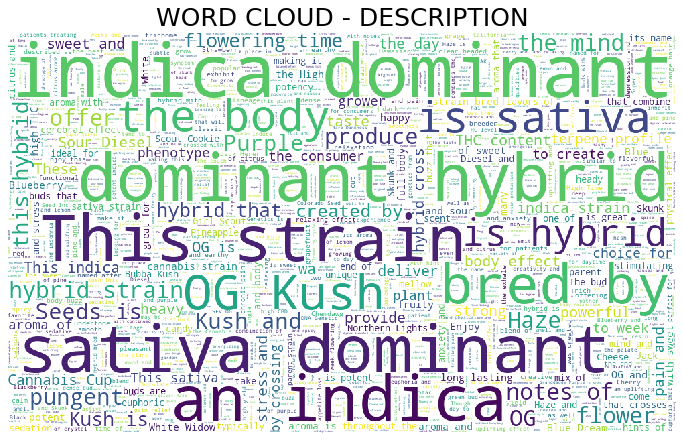

In [32]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df_strains['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

### Word Cloud Sativas

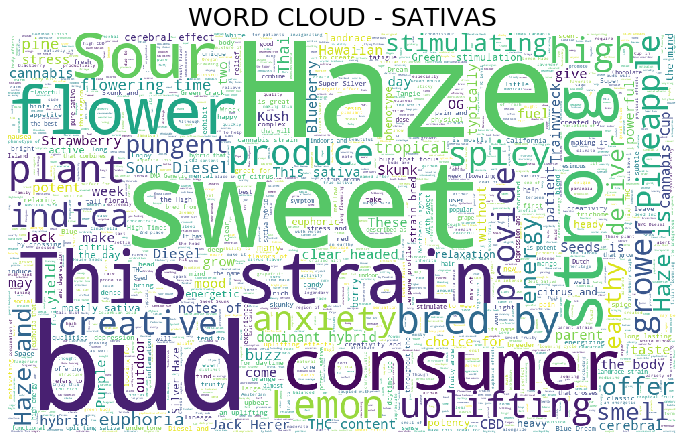

In [33]:


stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df_strains[df_strains.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()



### Word Cloud Indicas

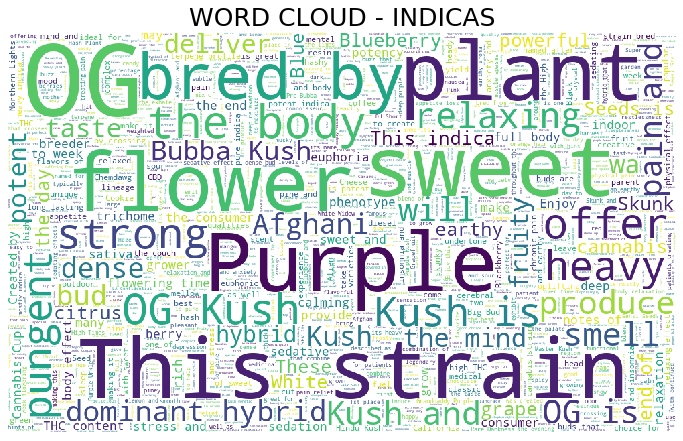

In [34]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df_strains[df_strains.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

### Word Cloud Hybrids

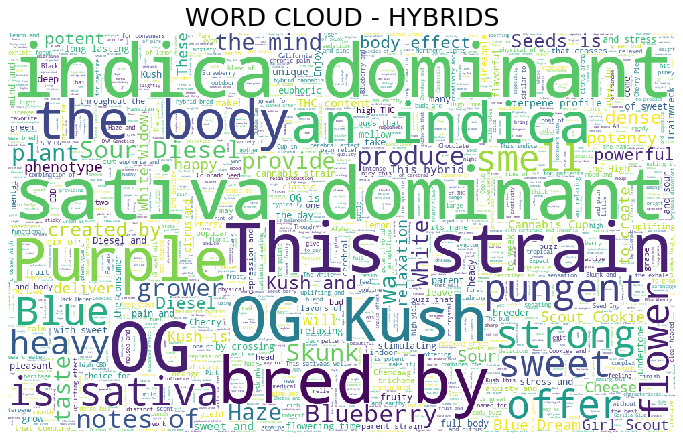

In [35]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df_strains[df_strains.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()

### Word Cloud Rating 5 Strains

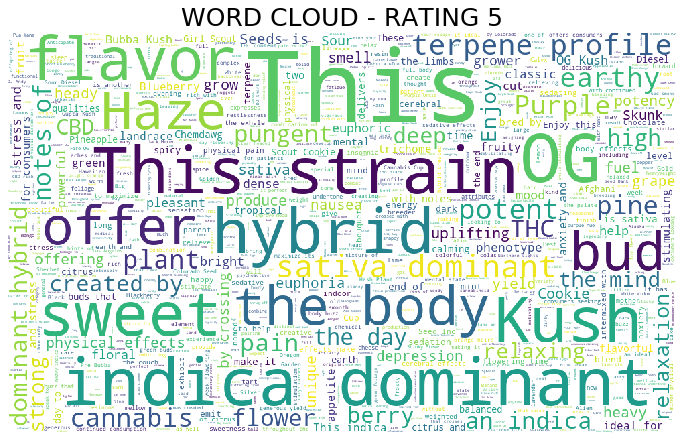

In [36]:


stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic','effects','cross','genetics',
                'aroma','consumer','known','dominant']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df_strains[df_strains.Rating == 5]['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - RATING 5", fontsize=25)
plt.axis('off')
plt.show()



### Preprocessing dataset

#### Encoding the target

In [37]:
#Transformin the Type in numerical 
df_strains["Type"] = pd.factorize(df_strains["Type"])[0]
del df_strains["Description"]
# Now we have 3 numerical Types
# 0 - Hybrid
# 1 - Sativa
# 2 - Indica

#### Getting dummy features

In [38]:
dummy = pd.get_dummies(df_strains[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])

#### Concating dummies into principal df

In [39]:
#Concatenating the result and droping the used variables 
df_strains = pd.concat([df_strains, dummy], axis=1)

df_strains = df_strains.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4',
                        'Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

df_strains.shape

(2351, 235)

### Importing Sklearn and Modeling:

In [47]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
# setting X and y
X = df_strains.drop("Type",1)
y = df_strains["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [49]:
#Spliting the variables in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 234)
X_test Shape:  (706, 234)


### Feature Selection

In [50]:
thresh = 5 * 10**(-3.5)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

In [51]:
print("X_important_train Shape: ", X_important_train.shape)
print("X_important_test Shape: ", X_important_test.shape)

X_important_train Shape:  (1645, 86)
X_important_test Shape:  (706, 86)


### Let's take a look at some models and compare their score

LogReg: 0.637690 (+/- 0.028925)
XGBClassifier: 0.578723 (+/- 0.024362)
KNN: 0.555015 (+/- 0.026748)
DecisionTreeClassifier: 0.514894 (+/- 0.023591)
RandomForestClassifier: 0.597568 (+/- 0.025691)
GradientBoostingClassifier: 0.631003 (+/- 0.015922)
RidgeClassifier: 0.638298 (+/- 0.027591)
BaggingRidgeClassifier: 0.552584 (+/- 0.029052)
ExtraTreesClassifier: 0.592097 (+/- 0.030053)


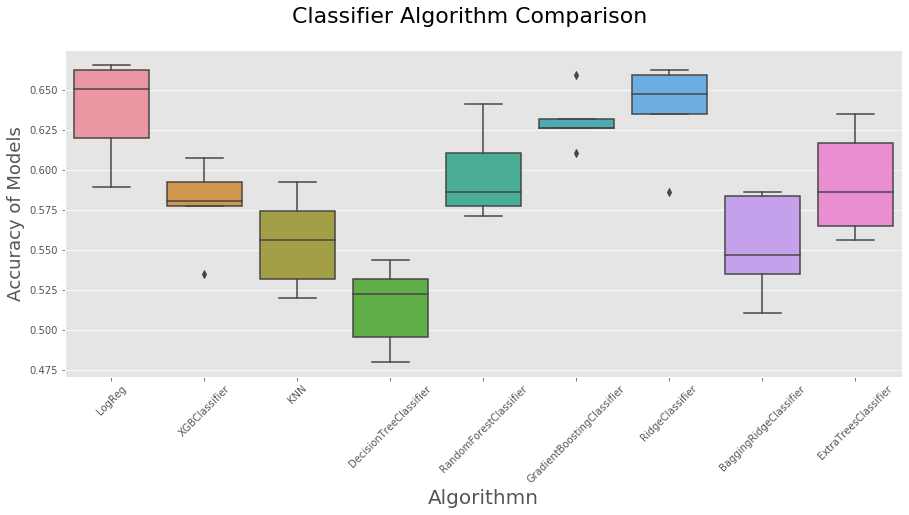

In [52]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

I will select the top 3 models and set some hyperParameters to try increase their prediction power.

    The top 3 will be:
        GradientBoostingClassifier
        XGBClassifier
        RidgeClassifier

### GridSearchCv

In [53]:
from sklearn.model_selection import GridSearchCV

params_ridge = {'alpha':[0.001, 0.1, 1.0],
                'tol':[0.1, 0.01, 0.001], 
                'solver':['auto', 'svd', 'cholesky','lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = RidgeClassifier()
    
Ridge_model = GridSearchCV(estimator = ridge, param_grid=params_ridge, 
                           verbose=1, n_jobs = -1, 
                           cv=5)

# Fit the random search model
Ridge_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   21.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [54]:
# Printing the Training Score
print("Training score data: ")
print(Ridge_model.score(X_important_train, y_train) )
print("Ridge Best Parameters: ")
print(Ridge_model.best_params_ )

Training score data: 
0.676595744680851
Ridge Best Parameters: 
{'alpha': 0.1, 'solver': 'sparse_cg', 'tol': 0.001}


### Now, let's Predict with this model

In [55]:
# Predicting with X_test
Ridge_model = RidgeClassifier(solver='sparse_cg', tol=0.001, alpha=1.0)
Ridge_model.fit(X_important_train, y_train)
y_pred = Ridge_model.predict(X_important_test)

# Print the results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6147308781869688
[[273  35  65]
 [ 88  37   4]
 [ 76   4 124]]
              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       373
         1.0       0.49      0.29      0.36       129
         2.0       0.64      0.61      0.62       204

    accuracy                           0.61       706
   macro avg       0.58      0.54      0.55       706
weighted avg       0.60      0.61      0.60       706



### Now, I will evaluate the best params to XGBoost model

In [56]:
param_xgb = {
 'n_estimators':[100,150,200],
 'max_depth':[3,4,5,6],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[.1, 0.2, 0.3,0.6,0.7,0.8],
 'colsample_bylevel':[0.2,0.6,0.8]
}

In [57]:
xgb = XGBClassifier()

xgb_model = GridSearchCV(estimator = xgb, 
                        param_grid = param_xgb, 
                        scoring='accuracy',
                        cv=3,
                        verbose = 1)

xgb_model.fit(X_important_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed: 17.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bylevel': [0.2

In [58]:
print("Results of the GridSearchCV of XGB: ")
print(xgb_model.best_params_)
print(xgb_model.score(X_important_train, y_train))

Results of the GridSearchCV of XGB: 
{'colsample_bylevel': 0.6, 'colsample_bytree': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100}
0.739209726443769


In [59]:
# let's set the best parameters to our model and fit again
xgb = XGBClassifier(colsample_bylevel=0.1, colsample_bytree=.8,
                    objective='multi', max_depth= 4, min_child_weight= 2, 
                    n_estimators= 150)

xgb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = xgb.predict(X_important_test)

# Print the results
print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

METRICS 
Accuracy Score:  0.6090651558073654
[[267  46  60]
 [ 81  45   3]
 [ 82   4 118]]
              precision    recall  f1-score   support

         0.0       0.62      0.72      0.67       373
         1.0       0.47      0.35      0.40       129
         2.0       0.65      0.58      0.61       204

    accuracy                           0.61       706
   macro avg       0.58      0.55      0.56       706
weighted avg       0.60      0.61      0.60       706



### Now let's fit and predict with Gradient Boosting Classifier model

In [60]:
param_gb = {
    'n_estimators':[50, 125, 150],
    'max_depth':[2,3,4],
    'max_features':[3,4,5,6],
    'learning_rate':[0.0001, 0.001, 0.01,0.1,1]
}

gb = GradientBoostingClassifier()

gb_model = GridSearchCV(estimator = gb, 
                        param_grid = param_gb, 
                        scoring='accuracy',
                        cv=5,
                        verbose = 1)

gb_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [61]:
print("Results of the GridSearchCV of Gradient Boosting Classifier: ")
print(gb_model.best_params_)
print(gb_model.score(X_important_train, y_train))

Results of the GridSearchCV of Gradient Boosting Classifier: 
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 6, 'n_estimators': 125}
0.7513677811550152
